# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeather map API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"



### Generate the Cities List by Using the 'citipy' Library

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations######################################
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# set the API base URL
url="http://api.openweathermap.org/data/2.5/weather?"
# city=""
query_url=url+"appid="+weather_api_key+"&units=imperial"+"&q=" #+city

In [9]:
# Define an empty list to fetch the weather data for each city
#########################counters###########
record_count=0
set_count=1
############################
clouds = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []
city_list=[]
print("Beginning Data Retrieval")
print("-----------------------------")
# Loop through all the cities in our list to fetch weather data
for city in cities:
    try:
        response=requests.get(query_url+city).json()
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        # Group cities in sets of 50 for logging purposes
        if record_count>=50:
            record_count=1
            set_count+=1
            city_list.append(city)
        else:
            record_count+=1
            city_list.append(city)
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    except Exception:
        print("City not found. Skipping...")
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | tigil
Processing Record 3 of Set 1 | irtyshskiy
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | sao gabriel da cachoeira
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | zyryanka
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 13 of Set 1 | makakilo city
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | saint george
Processing Record 18 of Set 1 | palmer
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | la asuncion
Processing Record 21 of Set 1 | vila velha
Processin

Processing Record 38 of Set 4 | kuching
Processing Record 39 of Set 4 | mahibadhoo
Processing Record 40 of Set 4 | manavalakurichi
Processing Record 41 of Set 4 | vostok
Processing Record 42 of Set 4 | zhezkazgan
Processing Record 43 of Set 4 | teguldet
Processing Record 44 of Set 4 | pangnirtung
Processing Record 45 of Set 4 | natal
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | coari
Processing Record 49 of Set 4 | ha giang
Processing Record 50 of Set 4 | ocos
Processing Record 1 of Set 5 | ravar
City not found. Skipping...
Processing Record 2 of Set 5 | fort nelson
Processing Record 3 of Set 5 | summerville
Processing Record 4 of Set 5 | misratah
Processing Record 5 of Set 5 | salalah
Processing Record 6 of Set 5 | flagstaff
Processing Record 7 of Set 5 | quatre cocos
Processing Record 8 of Set 5 | nouadhibou
City not found. Skipping...
Processing Record 9 of Set 5 | lavrentiya
Processing Record 10 of Set 5 | roma
City

City not found. Skipping...
Processing Record 25 of Set 8 | zhigansk
Processing Record 26 of Set 8 | buraydah
Processing Record 27 of Set 8 | luderitz
Processing Record 28 of Set 8 | mbekenyera
Processing Record 29 of Set 8 | haines junction
Processing Record 30 of Set 8 | bani walid
Processing Record 31 of Set 8 | kiama
Processing Record 32 of Set 8 | moose factory
Processing Record 33 of Set 8 | hofn
Processing Record 34 of Set 8 | ayacucho
Processing Record 35 of Set 8 | kamaishi
Processing Record 36 of Set 8 | murree
Processing Record 37 of Set 8 | pisco
Processing Record 38 of Set 8 | bulgan
Processing Record 39 of Set 8 | chimbote
Processing Record 40 of Set 8 | paredon
Processing Record 41 of Set 8 | pokrovsk
City not found. Skipping...
Processing Record 42 of Set 8 | cabrobo
Processing Record 43 of Set 8 | san borja
Processing Record 44 of Set 8 | lokosovo
Processing Record 45 of Set 8 | perth
Processing Record 46 of Set 8 | road town
Processing Record 47 of Set 8 | besancon
Pr

Processing Record 12 of Set 12 | topolobampo
Processing Record 13 of Set 12 | mumbwa
Processing Record 14 of Set 12 | tupiza
Processing Record 15 of Set 12 | saint-francois
Processing Record 16 of Set 12 | oneonta
City not found. Skipping...
Processing Record 17 of Set 12 | hastings
Processing Record 18 of Set 12 | lata
Processing Record 19 of Set 12 | ponta delgada
Processing Record 20 of Set 12 | sovkhoznyy
Processing Record 21 of Set 12 | vilyuysk
Processing Record 22 of Set 12 | marawi
Processing Record 23 of Set 12 | san andres
Processing Record 24 of Set 12 | la carolina
Processing Record 25 of Set 12 | totness
Processing Record 26 of Set 12 | leme
-----------------------------
Data Retrieval Complete      
-----------------------------


In [20]:
#create dictionary for all the variables that extract from openweather
cities_dict={"City":city_list,
             "Cloudiness":clouds,
             "Country":country,
             "Date":date,
             "Humidity":humidity,
             "Latitude":latitude,
             "Longitude":longitude,
             "Max Temp":max_temp,
             "Wind Speed":wind_speed}

In [21]:
#convert dictionary to dataframe
cities_df=pd.DataFrame(cities_dict)
cities_df.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Latitude      576
Longitude     576
Max Temp      576
Wind Speed    576
dtype: int64

In [22]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,touros,99,BR,1677881544,88,-5.1989,-35.4608,76.91,8.01
1,tigil,100,RU,1677881544,100,57.8000,158.6667,-17.45,2.68
2,irtyshskiy,99,RU,1677881544,97,58.3333,68.1333,3.72,7.58
3,cape town,3,ZA,1677881544,83,-33.9258,18.4232,69.12,8.01
4,busselton,77,AU,1677881526,68,-33.6500,115.3333,67.26,11.74


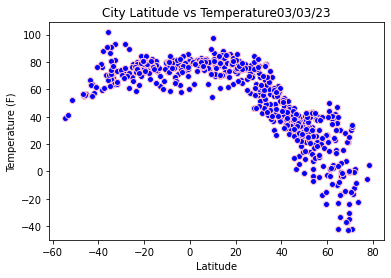

In [23]:
plt.scatter(cities_df["Latitude"],cities_df["Max Temp"],edgecolors="pink",facecolors="blue")
plt.title("City Latitude vs Temperature" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("output_data/Latitude vs Temperature.png")

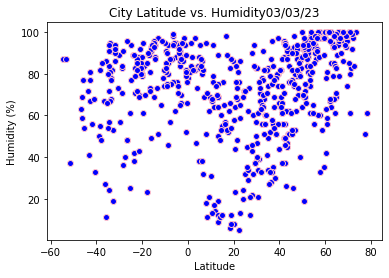

In [24]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity"],edgecolors="pink",facecolors="blue")
plt.title("City Latitude vs. Humidity" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Latitude vs Humidity.png")

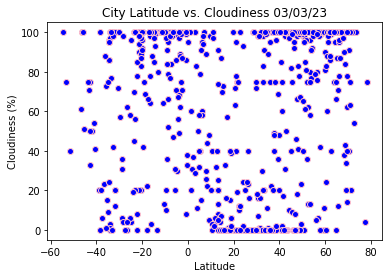

In [25]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"],edgecolors="pink",facecolors="blue")
plt.title("City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Latitude vs Cloudiness.png")

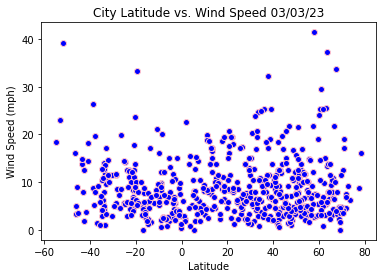

In [26]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed"],edgecolors="pink",facecolors="blue")
plt.title("City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Latitude vs Wind Speed.png")


---

## Requirement 2: Compute Linear Regression for Each Relationship

In [27]:
# Define a function to create Linear Regression plots. ylabel is Temp
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp")
    plt.plot(x_values,regression_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="pink")
    
    #State coefficient of determination

    return print(f"The r- value is: {round(rvalue**2,8)}")

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = cities_df.loc[cities_df["Latitude"] >= 0.0]
northern_hemi_df.reset_index(inplace=True)

# Display sample data
northern_hemi_df.head()

,index,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,1,tigil,100,RU,1677881544,100,57.8000,158.6667,-17.45,2.68
1,2,irtyshskiy,99,RU,1677881544,97,58.3333,68.1333,3.72,7.58
2,7,butaritari,100,KI,1677881537,82,3.0707,172.7902,81.54,13.78
3,8,zyryanka,12,RU,1677881545,94,65.7500,150.8500,-33.36,7.87
4,12,makakilo city,75,US,1677881546,68,21.3469,-158.0858,77.32,11.50


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = cities_df.loc[cities_df["Latitude"] < 0.0]
southern_hemi_df.reset_index(inplace=True)

# Display sample data
southern_hemi_df.head()

,index,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,0,touros,99,BR,1677881544,88,-5.1989,-35.4608,76.91,8.01
1,3,cape town,3,ZA,1677881544,83,-33.9258,18.4232,69.12,8.01
2,4,busselton,77,AU,1677881526,68,-33.6500,115.3333,67.26,11.74
3,5,carnarvon,4,AU,1677881544,77,-24.8667,113.6333,78.39,14.18
4,6,sao gabriel da cachoeira,95,BR,1677881545,78,-0.1303,-67.0892,82.11,0.36


###  Temperature vs. Latitude Linear Regression Plot

The r- value is: 0.75834952


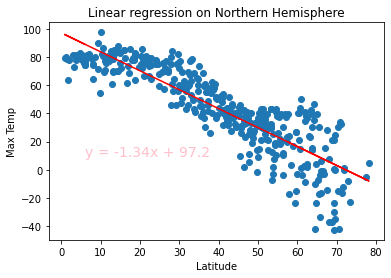

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Linear regression on Northern Hemisphere")
plot_linear_regression(x_values,y_values,'Max Temp',(6,10)) 
plt.savefig("Northern_hemi_regression.png")


The r- value is: 0.16860168


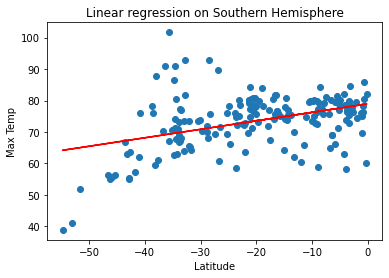

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Linear regression on Southern Hemisphere")
plot_linear_regression(x_values,y_values,'Max Temp',(6,10)) 
plt.savefig("Southern_hemi_regression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r- value is: 0.1885185


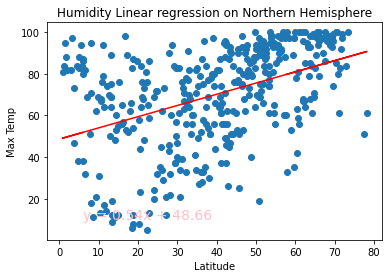

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity"]
plt.title("Humidity Linear regression on Northern Hemisphere")
plot_linear_regression(x_values,y_values,'Humidity',(6,10)) 
plt.savefig("Northern_hemi_Humidity_regression.png")

The r- value is: 0.12118439


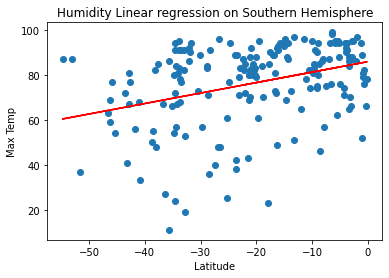

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity"]
plt.title("Humidity Linear regression on Southern Hemisphere")
plot_linear_regression(x_values,y_values,'Humidity',(6,10)) 
plt.savefig("Southern_hemi_Humidity_regression.png")

Discussion about the linear relationship: YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r- value is: 0.1453213


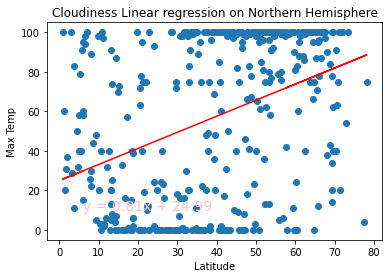

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Cloudiness Linear regression on Northern Hemisphere")
plot_linear_regression(x_values,y_values,'Cloudiness',(6,10)) 
plt.savefig("Northern_hemi_Cloudiness_regression.png")

The r- value is: 0.05910969


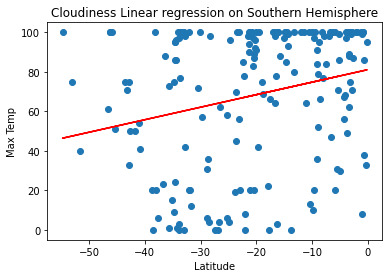

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Cloudiness Linear regression on Southern Hemisphere")
plot_linear_regression(x_values,y_values,'Cloudiness',(6,10)) 
plt.savefig("Southern_hemi_Cloudiness_regression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r- value is: 7.268e-05


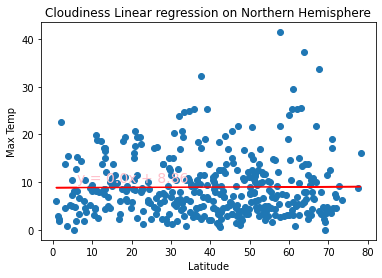

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Cloudiness Linear regression on Northern Hemisphere")
plot_linear_regression(x_values,y_values,'Wind Speed',(6,10)) 
plt.savefig("Northern_hemi_Windspeed_regression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r- value is: 0.10583874


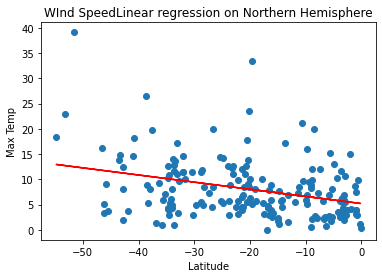

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("WInd SpeedLinear regression on Northern Hemisphere")
plot_linear_regression(x_values,y_values,'Wind Speed',(6,10)) 
plt.savefig("Southern_hemi_Windspeed_regression.png")